In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sampling_rate = 1000 #hertz
duration = 2 #seconds
time = np.linspace(0,duration, sampling_rate * duration)

In [3]:
np.random.seed(1)
num_trials = 20
spike_rate = 15
dt = 1/sampling_rate

spike_trains = []

for _ in range(num_trials):
    spikes = np.random.rand(len(time)) < spike_rate * dt
    spike_trains.append(spikes)

spike_trains = np.array(spike_trains)

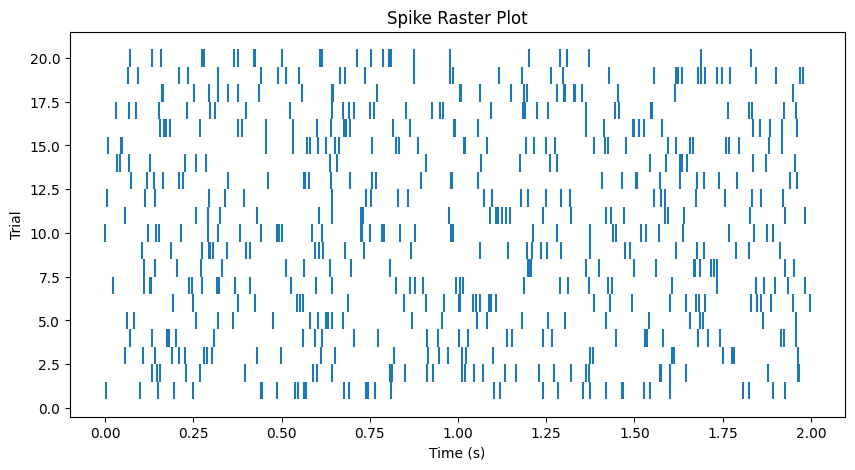

In [4]:
plt.figure(figsize=(10,5))

for trial in range(num_trials):
    spike_time = time[spike_trains[trial]]
    plt.vlines(spike_time, trial + 0.5, trial + 1.5)

plt.xlabel("Time (s)")
plt.ylabel("Trial")
plt.title("Spike Raster Plot")
plt.show()

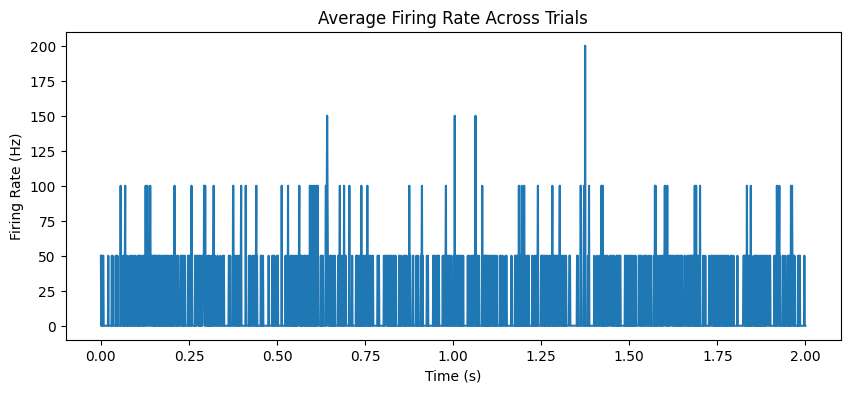

In [5]:
firing_rate = spike_trains.mean(axis=0) * sampling_rate

plt.figure(figsize=(10, 4))
plt.plot(time, firing_rate)
plt.xlabel("Time (s)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Average Firing Rate Across Trials")
plt.show()

In [6]:
event_time = 1.0

aligned_spikes = []

for trial in range(num_trials):
    spike_time = time[spike_trains[trial]]
    aligned = spike_time - event_time
    aligned_spikes.append(aligned)

bin_width = 0.05
bins = np.arange(-0.5, 0.5 + bin_width, bin_width)
all_spikes = np.concatenate(aligned_spikes)

psth_counts, bin_edges = np.histogram(all_spikes, bins = bins)
psth_rate = psth_counts / (num_trials * bin_width)

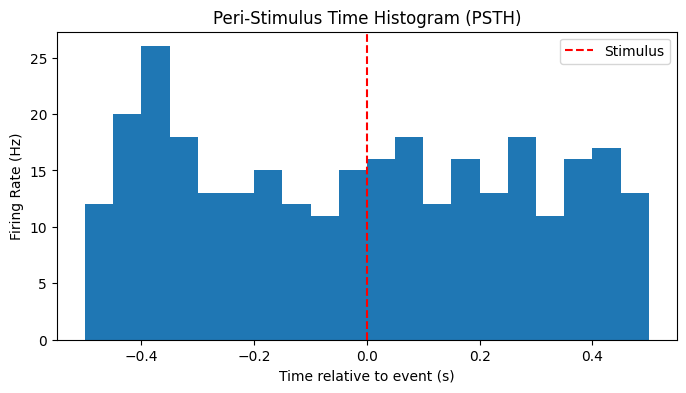

In [7]:
bin_centers = bin_edges[:-1] + bin_width / 2

plt.figure(figsize=(8, 4))
plt.bar(bin_centers, psth_rate, width=bin_width, align="center")
plt.axvline(0, color="red", linestyle="--", label="Stimulus")
plt.xlabel("Time relative to event (s)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Peri-Stimulus Time Histogram (PSTH)")
plt.legend()
plt.show()